In [154]:
import pickle


output_dir='../PassGAN_data/GNPassGAN_12-02-2023/'
output_orig_dir='./output/' #output original del modelo preentrenado

with open(output_dir+'log.pkl', 'rb') as f:
    data=pickle.load(f)

with open(output_orig_dir+'log.pkl', 'rb') as f:
    data_orig=pickle.load(f)

In [124]:
!ls {output_dir}

charmap.pickle        js2.jpg               time.jpg
charmap_inv.pickle    js3.jpg               train_critic_cost.jpg
checkpoints           js4.jpg               train_gen_cost.jpg
js1.jpg               log.pkl


In [155]:
print(data.keys())

dict_keys(['time', 'train critic cost', 'train gen cost', 'js1', 'js2', 'js3', 'js4'])


In [156]:
import pandas as pd
def parser_to_df(data):
    df=pd.DataFrame.from_dict(data)
    
    #Añadir indice para plotear las iteraciones
    df = df.reset_index()
    df=df.rename(columns={'index': 'iteracion'})

    #Formatear a float
    df['train critic cost']=df['train critic cost'].astype(float)
    df['train gen cost']=df['train gen cost'].astype(float)

    #Quitar nulos para ploter js1,js2,..
    df_filter=df.dropna()

    return df, df_filter

In [157]:
df, df_filter=parser_to_df(data)
df_orig, df_filter_orig=parser_to_df(data_orig)

df.describe()

,iteracion,time,train critic cost,train gen cost,js1,js2,js3,js4
count,20001.000000,20001.000000,20001.000000,20001.000000,200.000000,200.000000,200.000000,200.000000
mean,10000.000000,7.551603,1.030013,0.919605,0.069099,0.193976,0.423862,0.670969
std,5773.935703,77.008213,0.071928,0.067970,0.044909,0.077919,0.078601,0.037171
min,0.000000,1.259974,0.672576,0.675240,0.039599,0.123255,0.342694,0.627592
25%,5000.000000,1.346050,0.988539,0.874479,0.051398,0.142160,0.366721,0.644143
50%,10000.000000,1.368411,1.059169,0.900834,0.061128,0.163353,0.384106,0.653945
75%,15000.000000,1.399907,1.083757,0.948347,0.069365,0.214015,0.460293,0.692419
max,20000.000000,1076.503026,1.212190,1.292223,0.441614,0.627159,0.722297,0.810108


## Análisis del modelo preentrendaodo de GNPassGAN

In [158]:

import matplotlib.pyplot as plt

def plot_variable(df,df_orig,mesure_col,yaxis_limit=False,xaxis_limit=False):
    fig, axs = plt.subplots(2)
    fig.set_dpi(500)
    plt.rcParams.update({'font.size': 5})
    plt.rc('axes', titlesize=5)     # fontsize of the axes title
    plt.rc('axes', labelsize=5)    # fontsize of the x and y labels

    axs[0].plot(df['iteracion'], df[mesure_col])
    axs[0].set_title(f"{mesure_col.title()} del modelo {output_dir.split('/')[-2]}")
    
    axs[1].plot(df_orig['iteracion'], df_orig[mesure_col])
    axs[1].set_title(f"{mesure_col.title()} Orig")

    if yaxis_limit:
        axs[0].set_ylim([1, 2.5])
        axs[1].set_ylim([0, 1])
        
    if xaxis_limit:
        axs[0].set_xlim([0, 20000])
        axs[1].set_xlim([0, 20000])


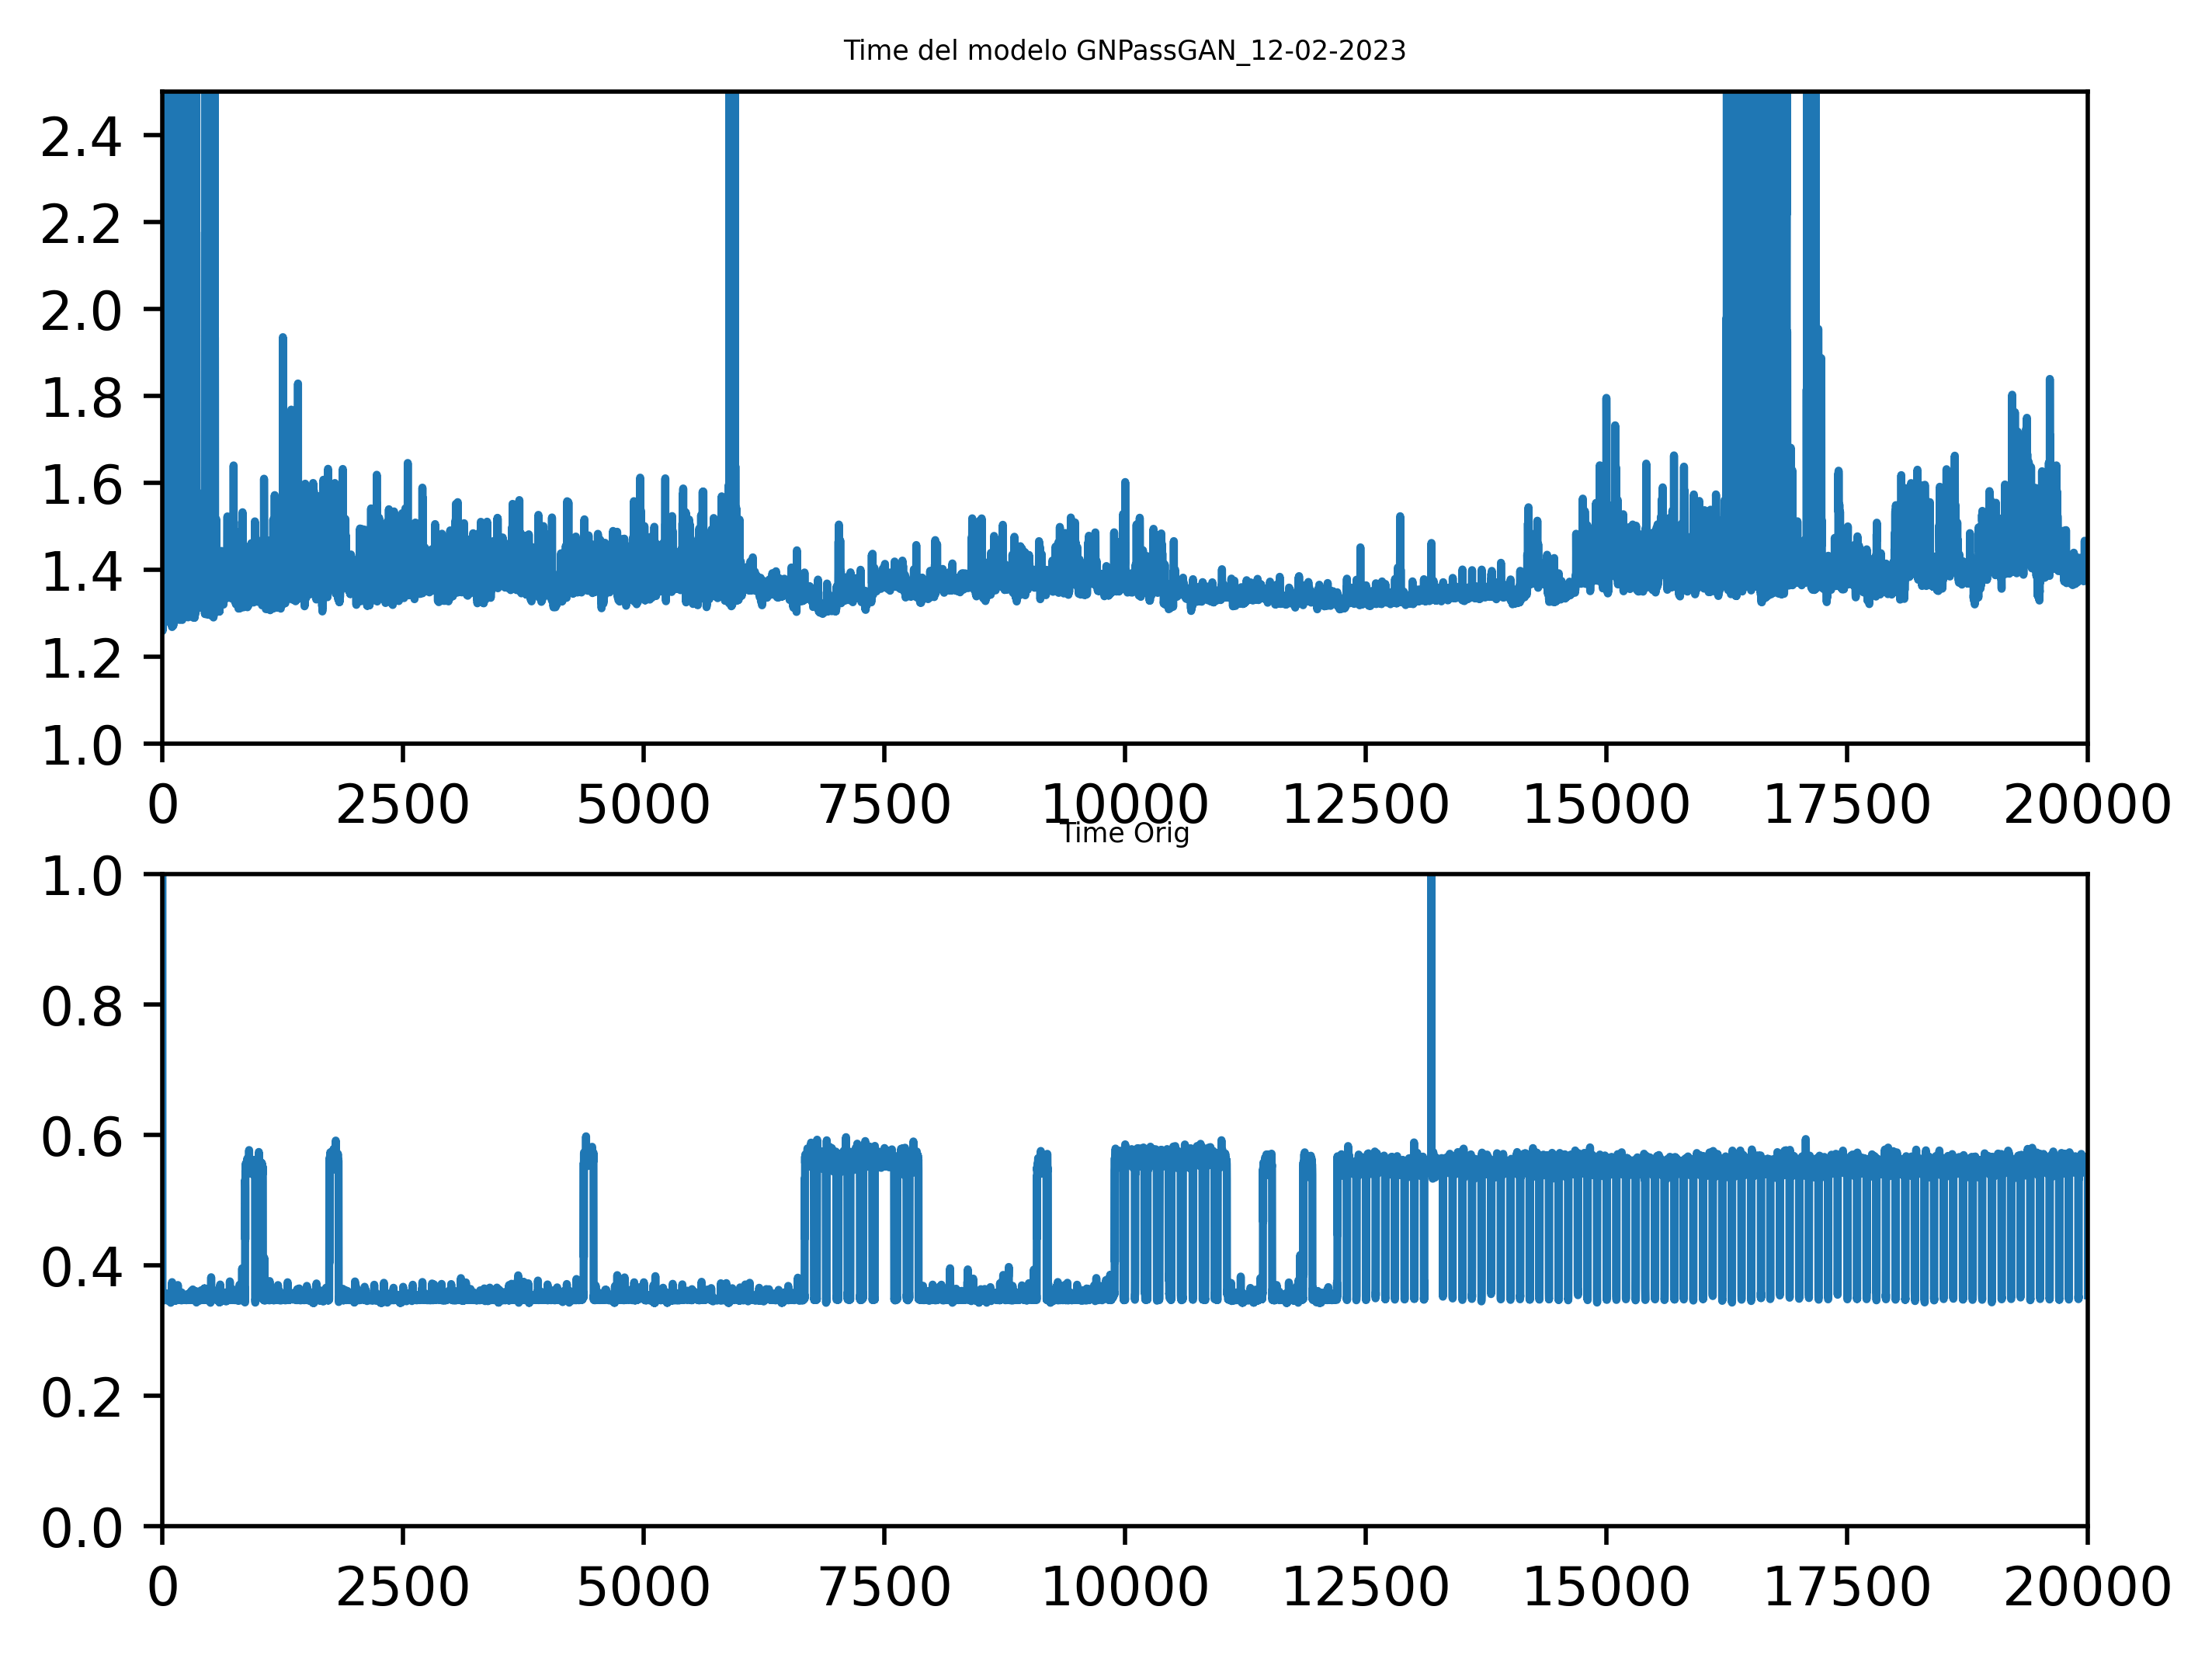

In [159]:
plot_variable(df,df_orig,mesure_col='time',yaxis_limit=True,xaxis_limit=True)

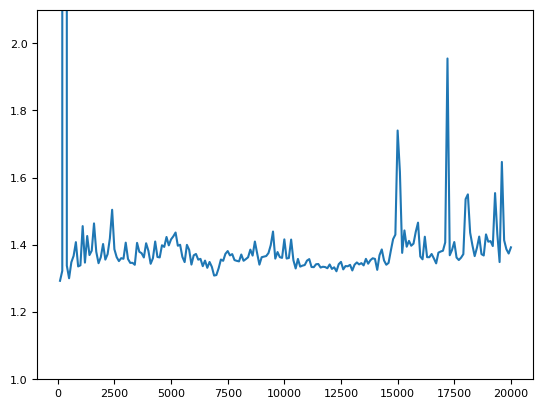

In [202]:
plt.ylim(ymax=2.1, ymin=1)
plt.plot(df_filter['iteracion'],df_filter['time'])

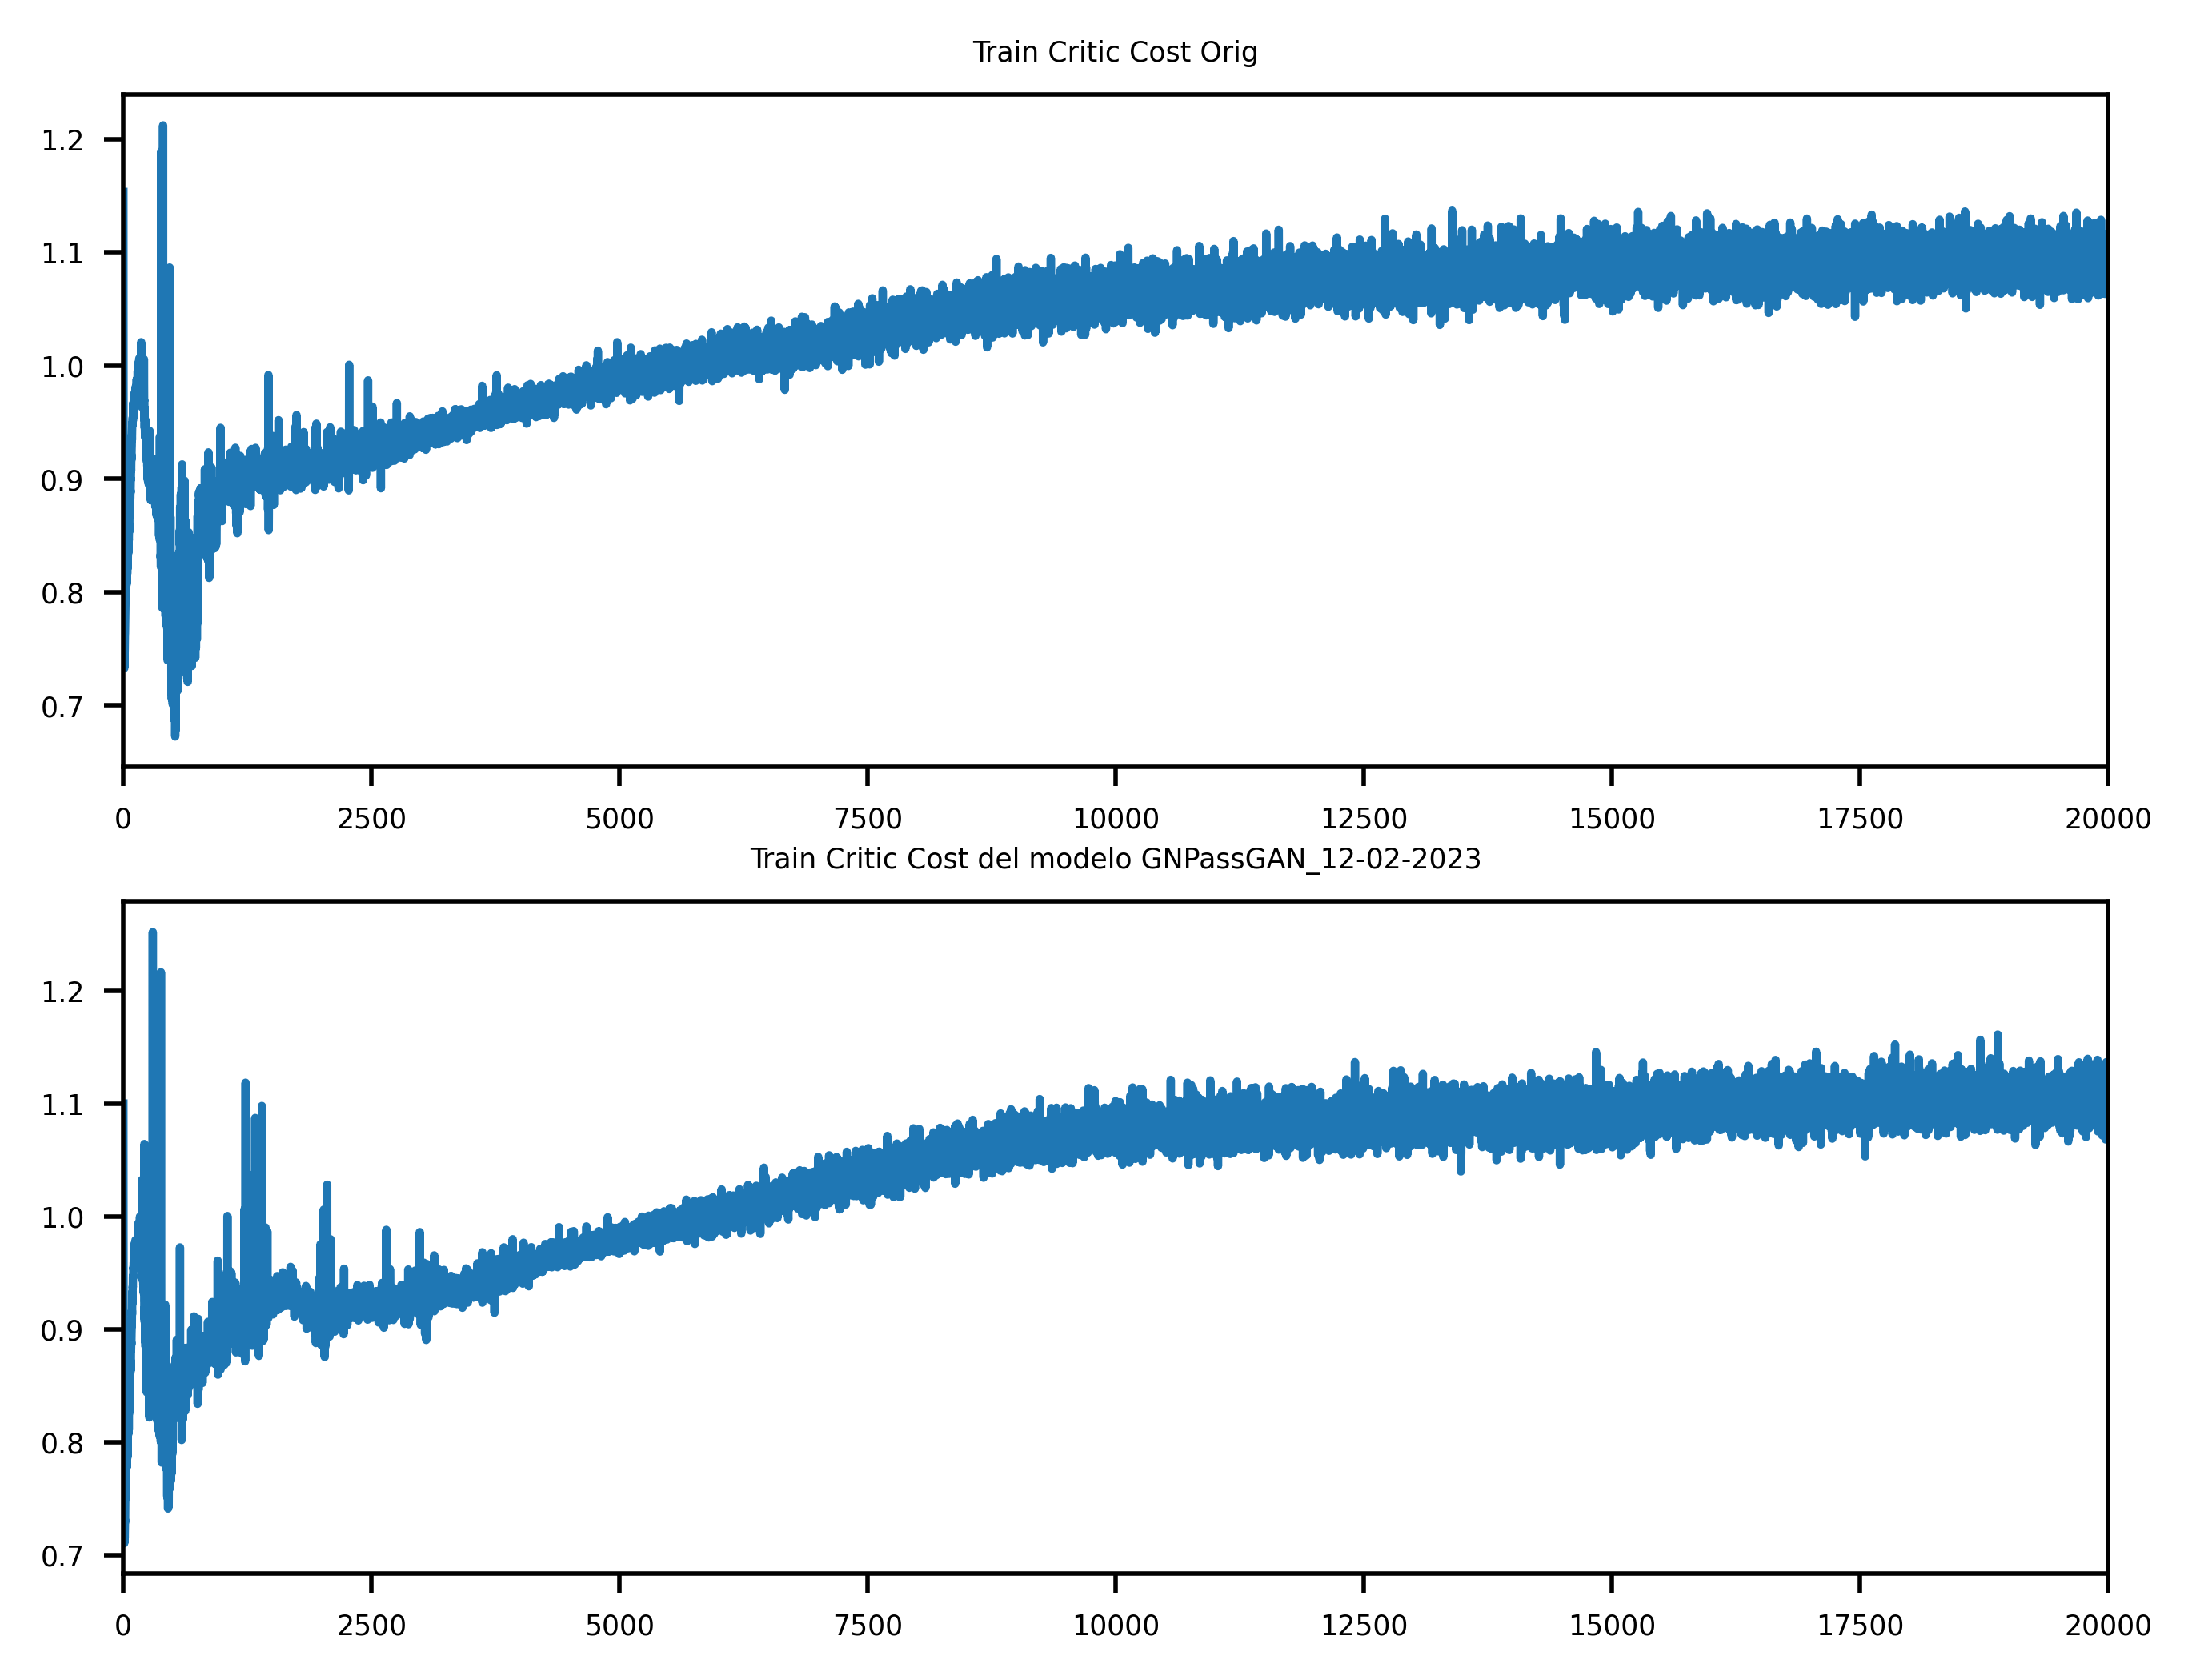

In [219]:
#df.plot('index','train critic cost')
plot_variable(df,df_orig,mesure_col='train critic cost',xaxis_limit=True)

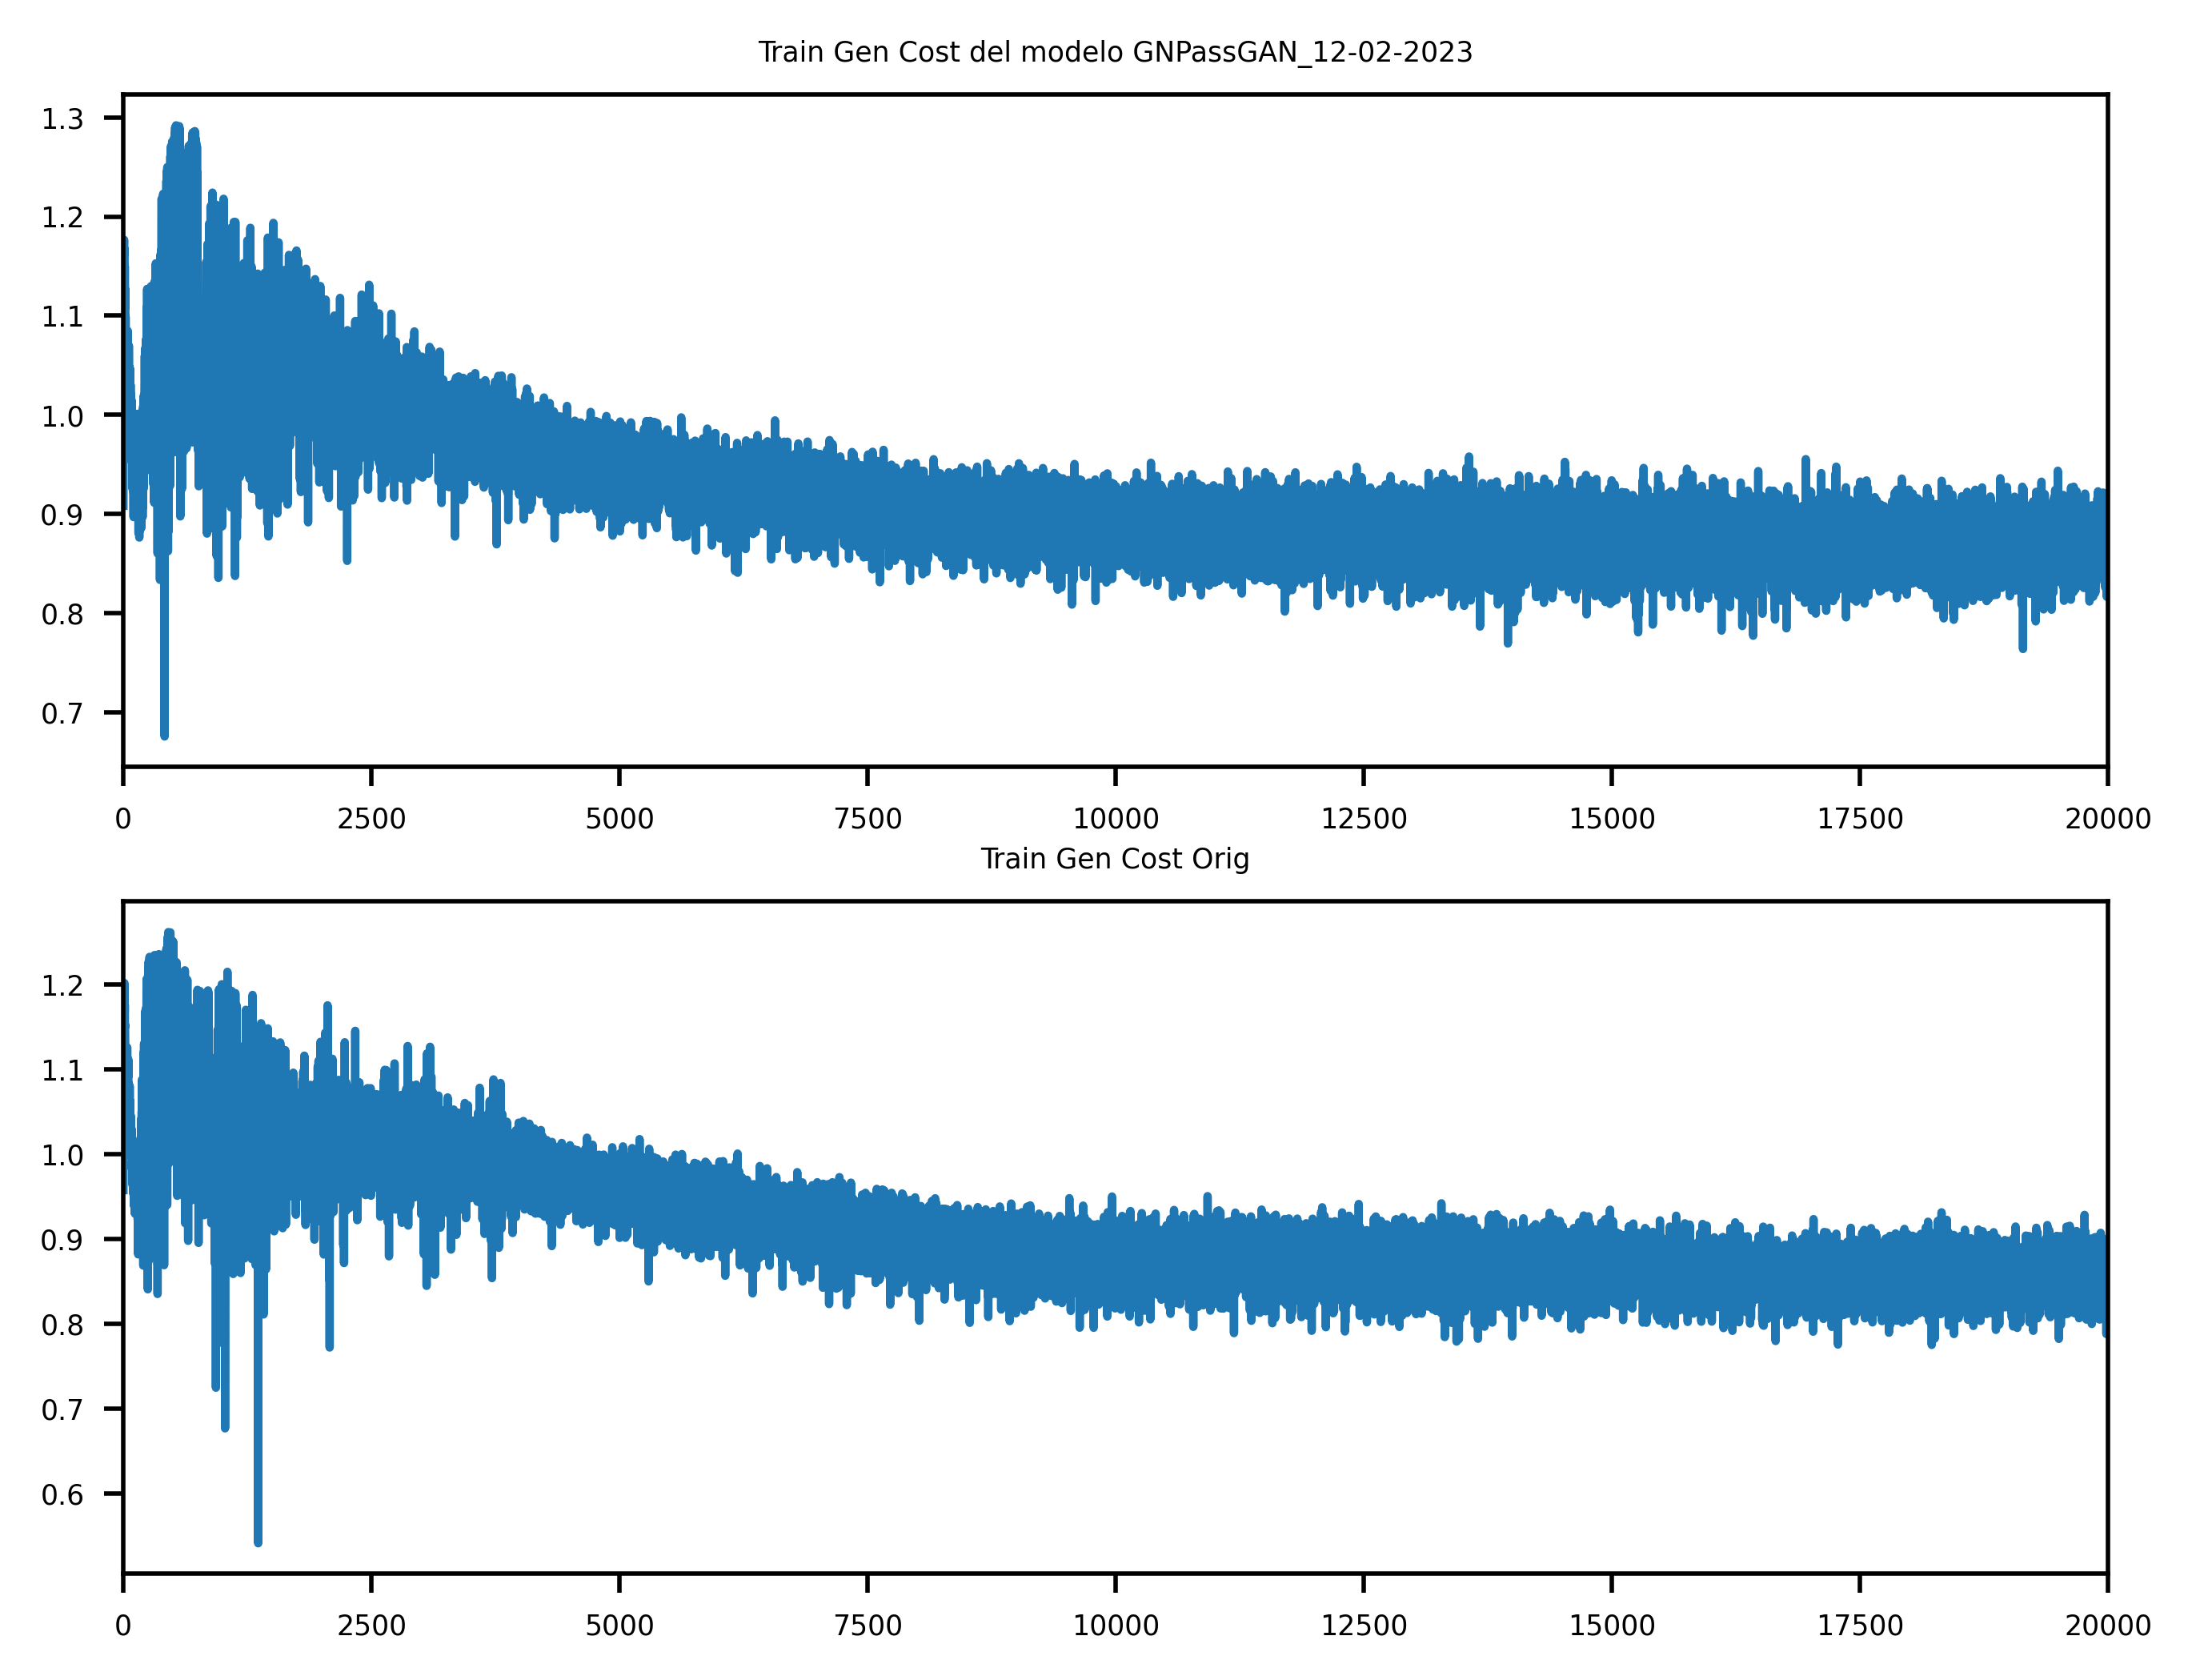

In [161]:
#df.plot('index','train gen cost')
plot_variable(df,df_orig,mesure_col='train gen cost',xaxis_limit=True)

In [163]:
def plot_js(df_filter,xaxis_limit=False):
    fig, axs = plt.subplots(2, 2)
    fig.set_dpi(500)

    plt.rcParams.update({'font.size': 5})
    plt.rc('axes', titlesize=5)     # fontsize of the axes title
    plt.rc('axes', labelsize=5)    # fontsize of the x and y labels

    i=0
    j=0
    for col in ['js1','js2','js3','js4']:#df.columns:
        if col!='index':
            axs[i, j].plot(df_filter['iteracion'], df_filter[col])
            axs[i, j].set_title(col)

            if xaxis_limit:
                axs[i, j].set_xlim([0, 20000])
                
            if j:
                j=0
                i=i+1
            else:
                j=1
    
        



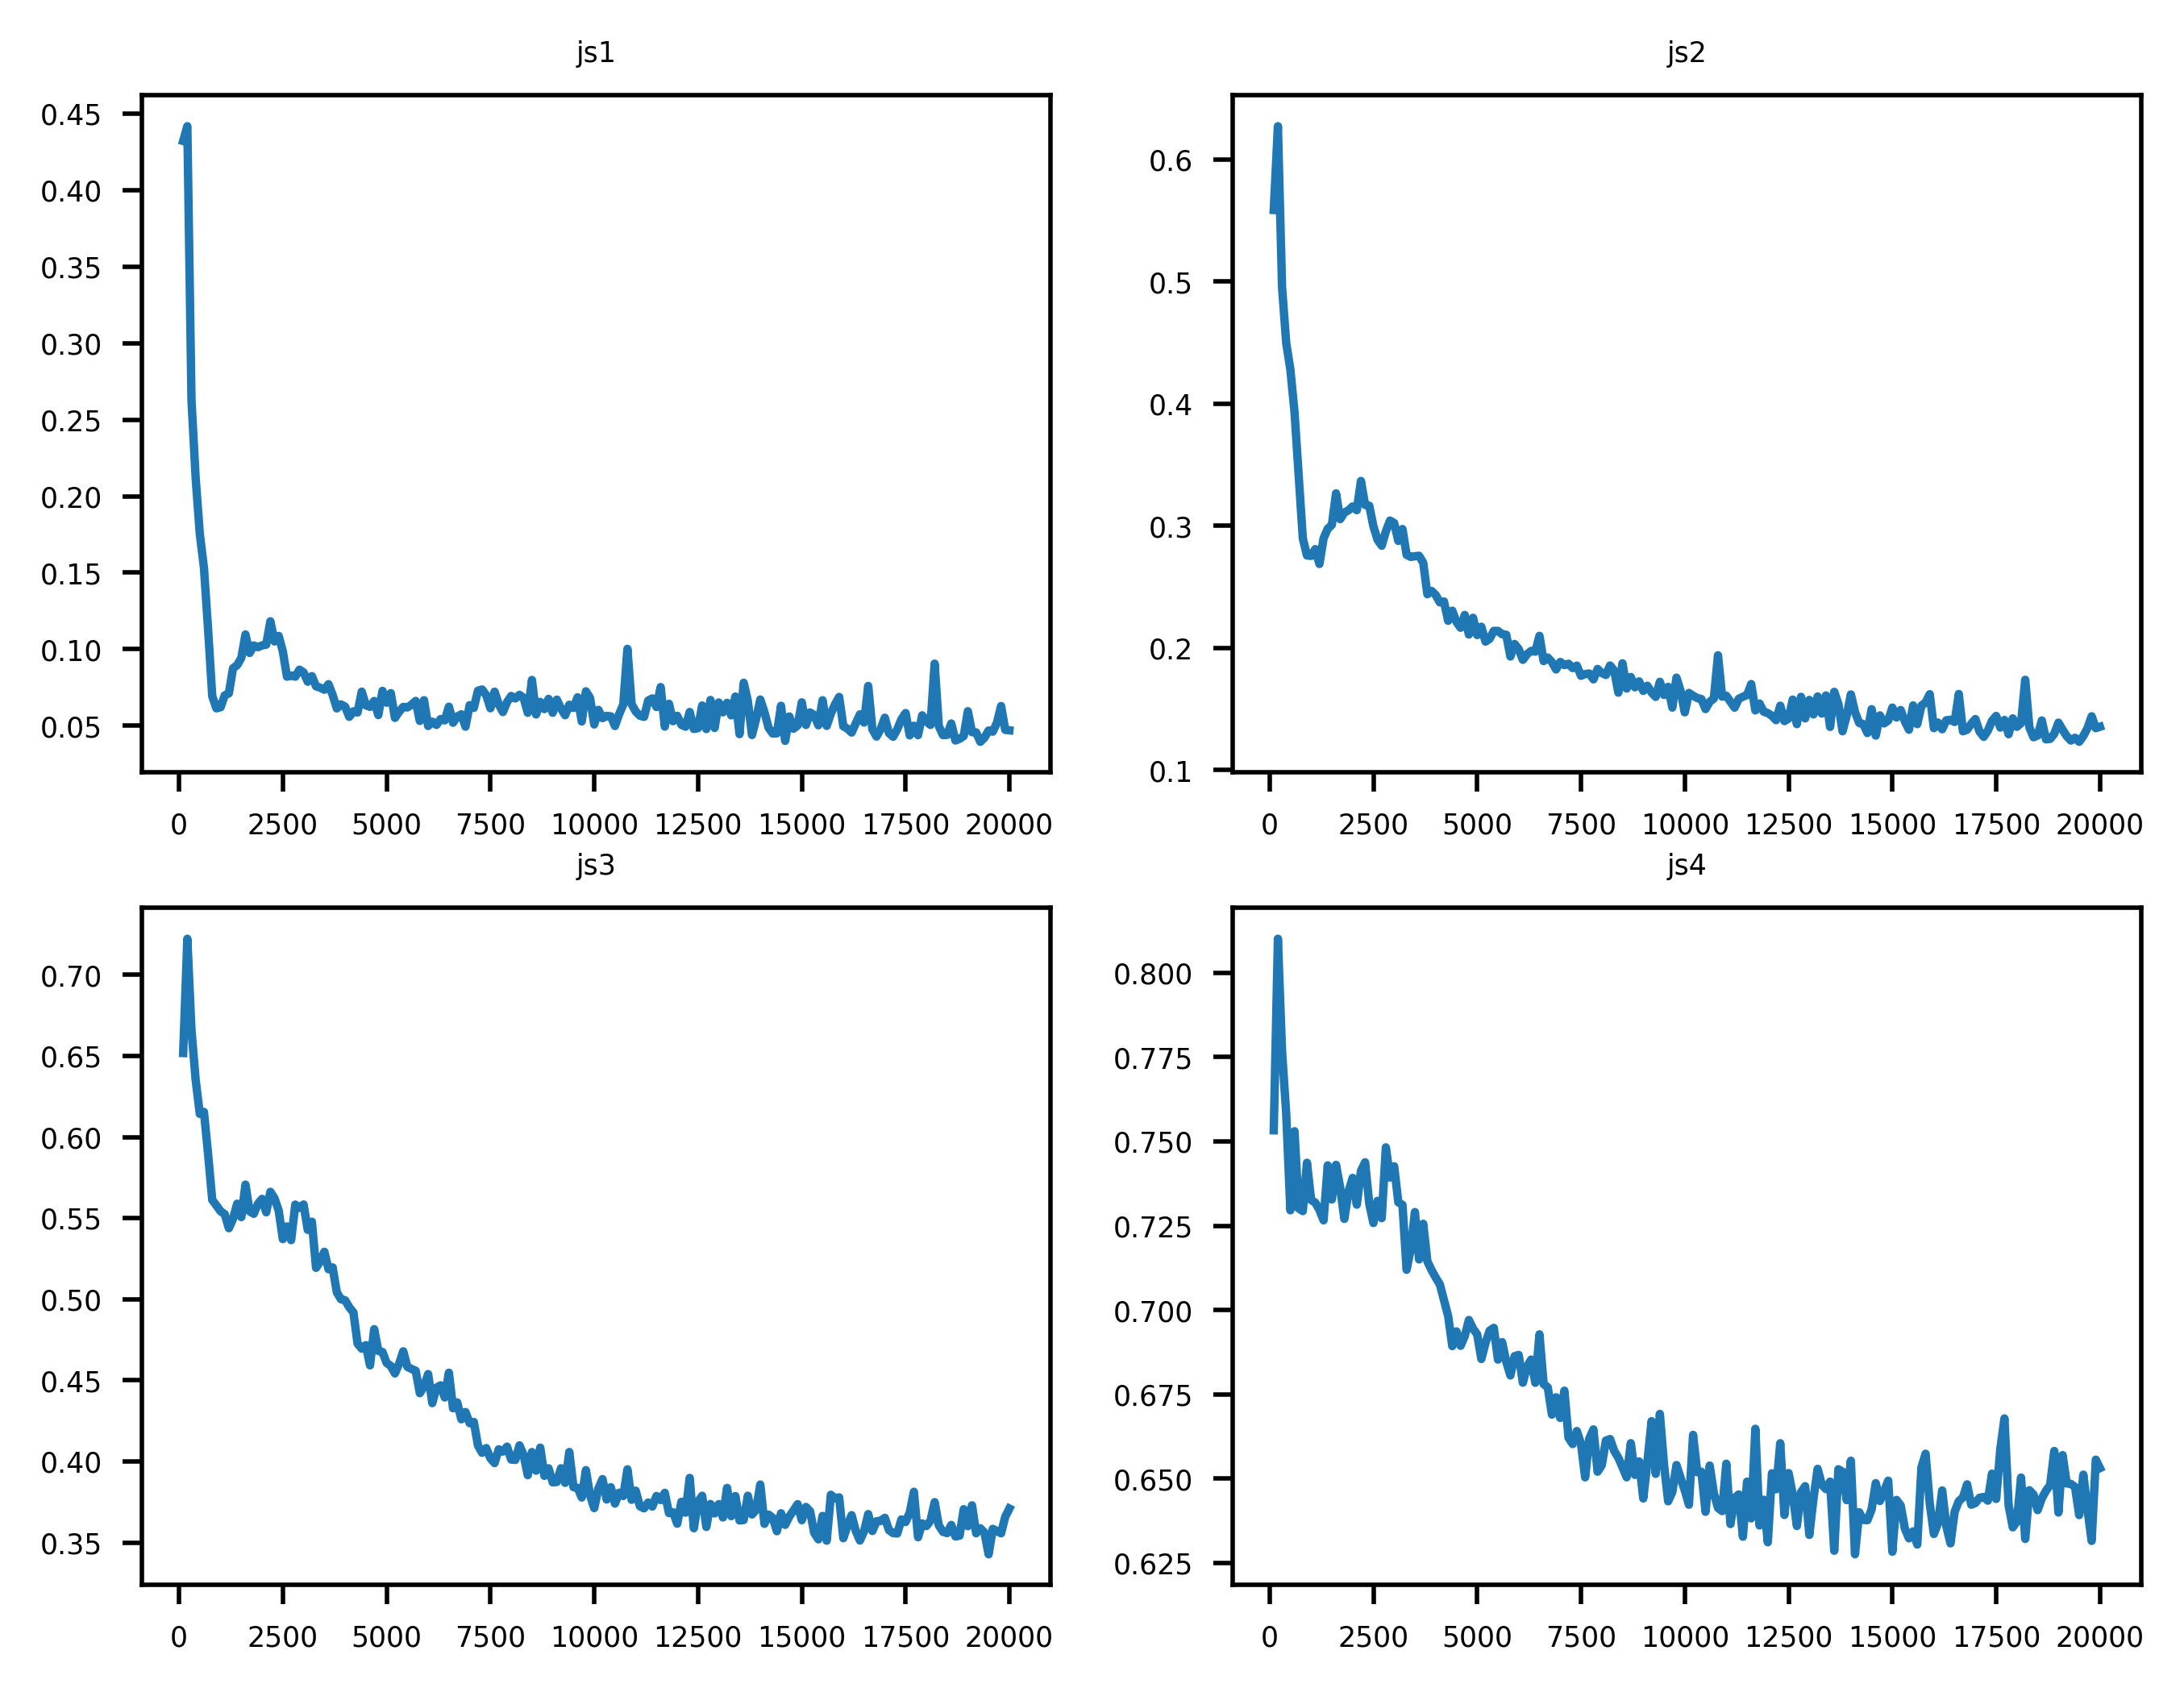

In [164]:
plot_js(df_filter)

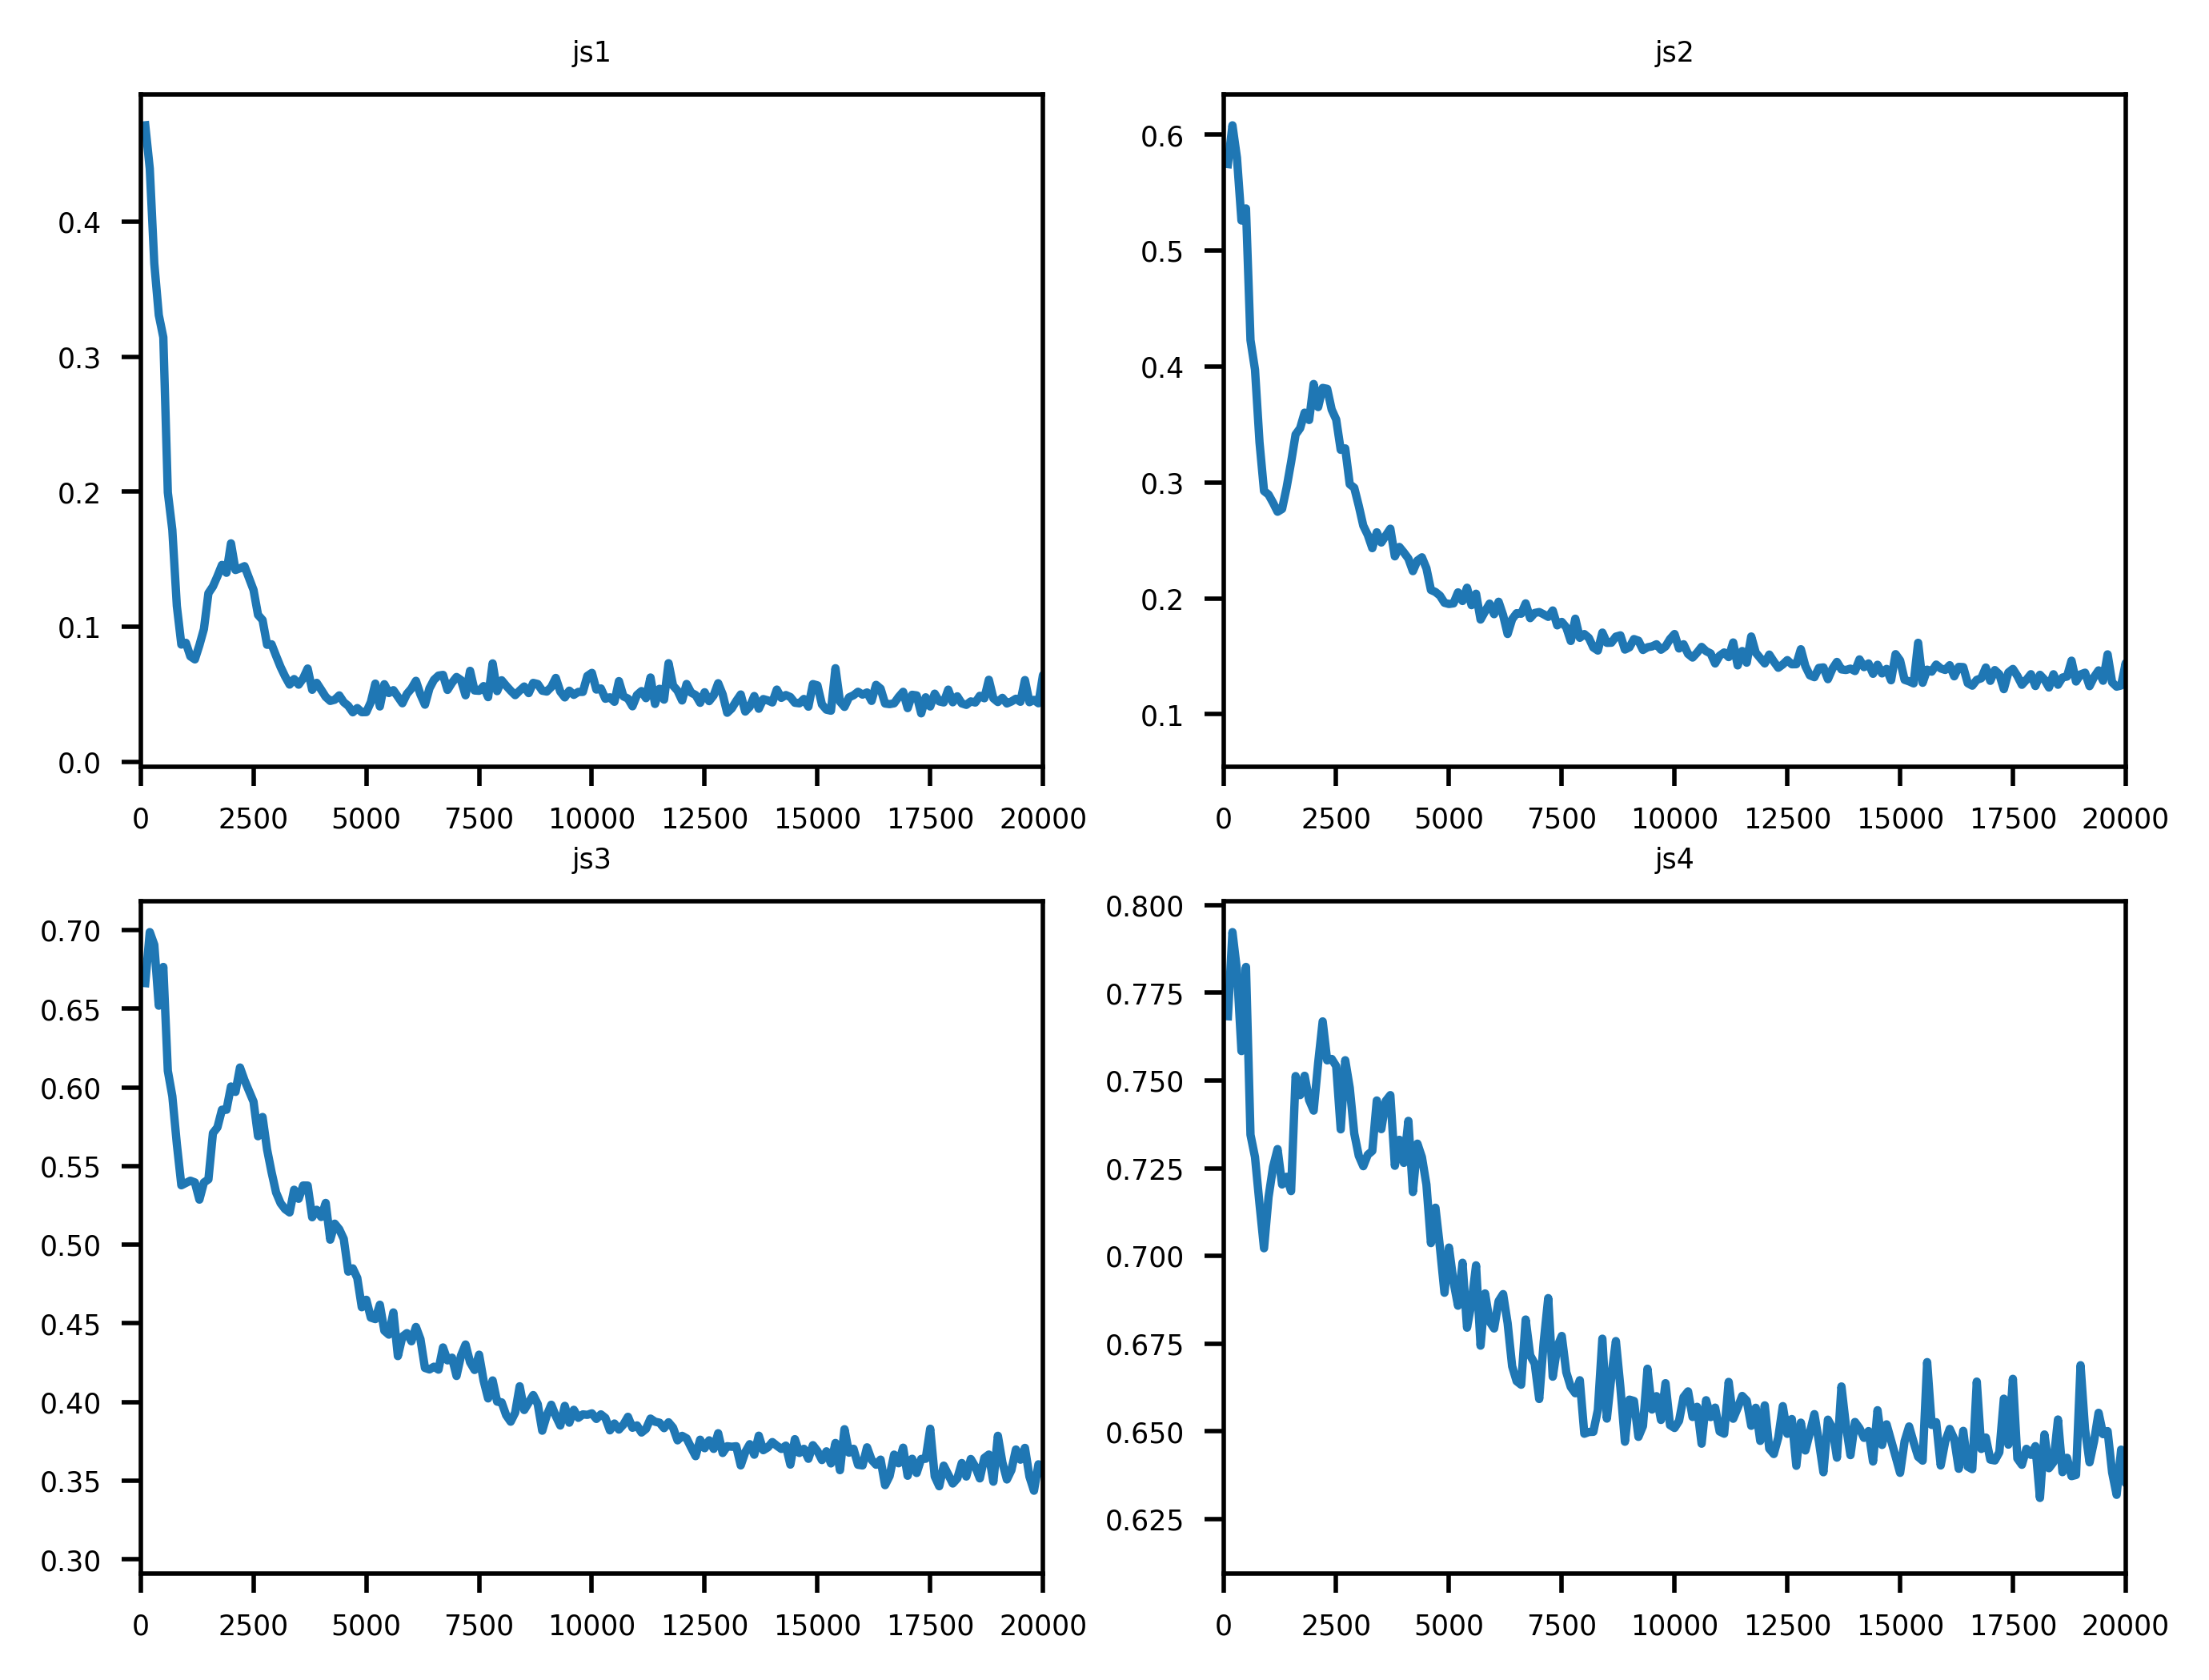

In [165]:
plot_js(df_filter_orig,xaxis_limit=True)

## Accuracy Contraseñas Generadas

#### Analizar Porcentaje de Acierto

In [166]:
import pandas as pd

model_trained_dir='../PassGAN_data/GNPassGAN_orig'

def leer_accuracy(model_trained_dir):
    df_accuracy=pd.read_csv(model_trained_dir +"/evaluacion/report.csv")
    name_filter=df_accuracy.path_generated.str.split('/').str[-1].str.replace('len100000000_','').str.replace("len100000000","")
    df_accuracy['seed']=name_filter.str.split('_').str[-1].str.replace(".txt","")
    df_accuracy['n_train_iter']=name_filter.str.split('_').str[-2].str.replace("train","")
    
    return df_accuracy

df_accuracy=leer_accuracy(model_trained_dir)

/var/folders/66/bpp5grj11s325w3yk6d7gz380000gn/T/ipykernel_65349/805165123.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df_accuracy['seed']=name_filter.str.split('_').str[-1].str.replace(".txt","")


In [194]:
def set_plt_text_size():
    SMALL_SIZE = 8
    MEDIUM_SIZE = 10
    BIGGER_SIZE = 22

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [195]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_accuracy(df_accuracy,title,logy=False):

    set_plt_text_size()
    
    #fig=sns.lineplot(x='n_passwords', y='guessing accuracy', hue=df_accuracy[['n_train_iter', 'seed']].apply(tuple, axis=1), data=df_accuracy, marker="o")
    fig=sns.lineplot(x='n_passwords', y='guessing accuracy', hue='n_train_iter', data=df_accuracy, marker="o")
    if logy:
        plt.yscale('log')
    plt.xscale('log')

    fig.set(title=title)
    
    # label points on the plot
    if logy:
        df_accuracy_label=df_accuracy[(df_accuracy['n_train_iter']=='200000')]
    else:
        df_accuracy_label=df_accuracy[(df_accuracy['n_passwords']==100000000) | (df_accuracy['n_train_iter']=='200000')]
        
    for x, y in zip(df_accuracy_label['n_passwords'], df_accuracy_label['guessing accuracy']):
        # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
        plt.text(x = x-10*2, # x-coordinate position of data label 
                y = y, # y-coordinate position of data label, adjusted to be 150 below the data point
                s = '{:.4f}%'.format(y), # data label, formatted to ignore decimals
                color = 'purple') # set colour of line
    plt.show()


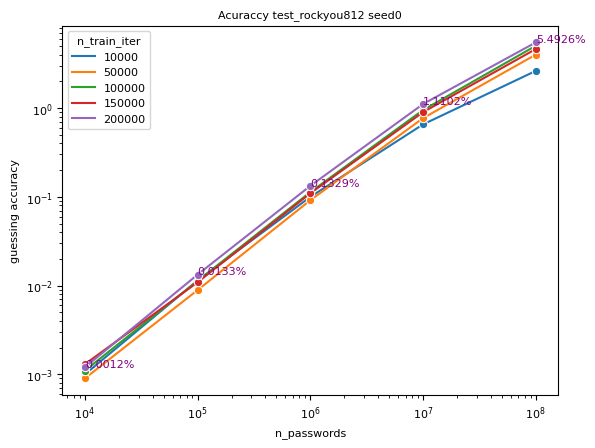

In [196]:
title='Acuraccy test_rockyou812 seed0'
plot_accuracy(df_accuracy[df_accuracy['seed']==''],title,logy=True)

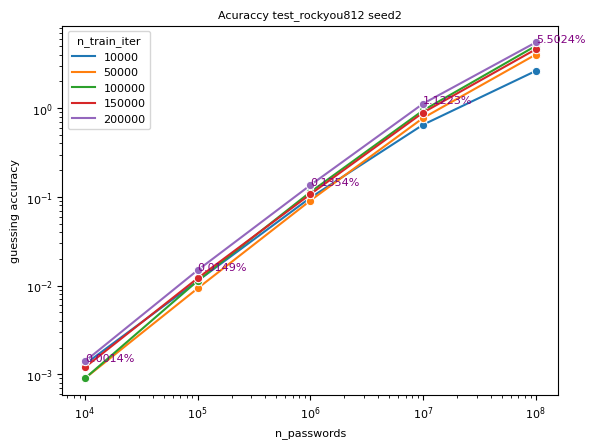

In [197]:
title='Acuraccy test_rockyou812 seed2'
plot_accuracy(df_accuracy[df_accuracy['seed']=='seed2'],title,logy=True)

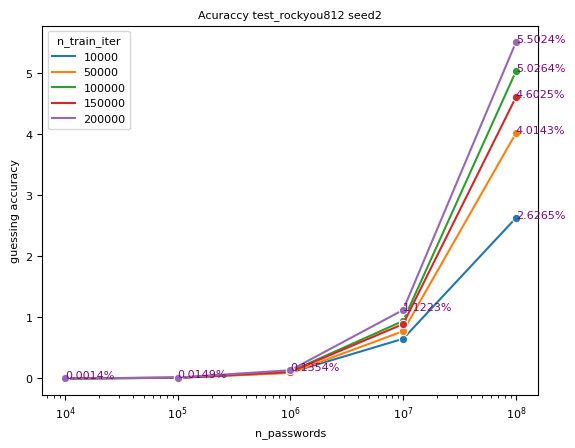

In [198]:
title='Acuraccy test_rockyou812 seed2'
plot_accuracy(df_accuracy[df_accuracy['seed']=='seed2'],title)

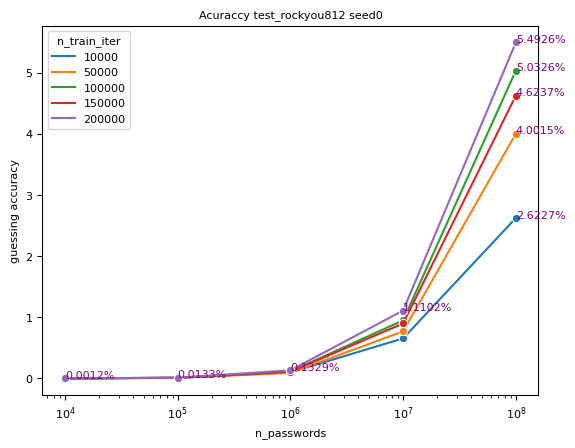

In [199]:
title='Acuraccy test_rockyou812 seed0'
plot_accuracy(df_accuracy[df_accuracy['seed']==''],title)

#### Analizar Porcentaje de Contraseñas Únicas

LLama la atención que con 200.000 iteraciones el número de ocntraseñas únicas se reduce. El máximo con 10^8 iteraciones se consigue para 

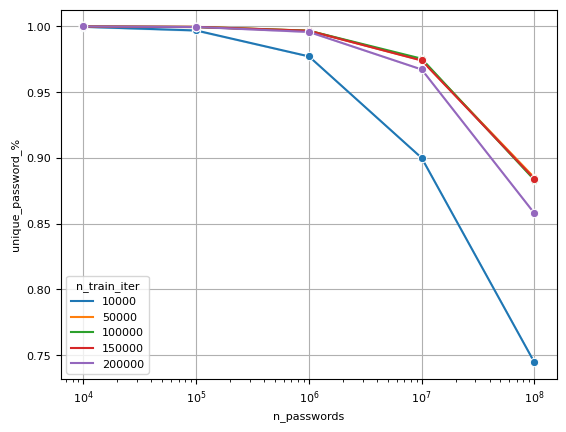

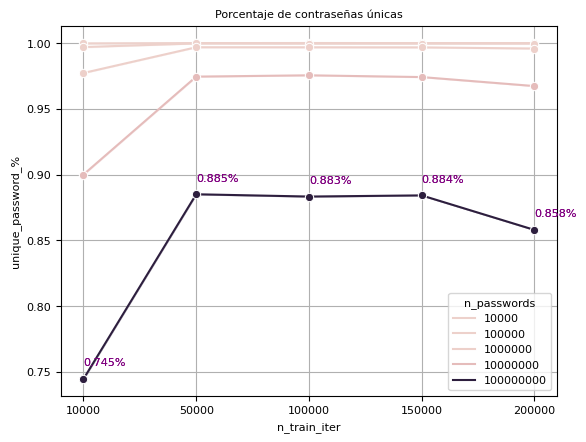

In [200]:
def plot_unique_pswords(df_accuracy):
    df_accuracy['unique_password_%']=df_accuracy['n_unique_generated_passwords']/df_accuracy['n_passwords']
    fig=sns.lineplot(x='n_passwords', y='unique_password_%', hue='n_train_iter', data=df_accuracy,marker="o")
    plt.xscale('log')
    plt.grid()
    plt.show()

    fig=sns.lineplot(x='n_train_iter', y='unique_password_%', hue='n_passwords', data=df_accuracy,marker="o")
    fig.set(title='Porcentaje de contraseñas únicas')
    df_accuracy_label=df_accuracy[(df_accuracy['n_passwords']==10**8)]
    for x, y in zip(df_accuracy_label['n_train_iter'], df_accuracy_label['unique_password_%']):
        # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
        plt.text(x = x, # x-coordinate position of data label 
                y = y+0.01, # y-coordinate position of data label, adjusted to be 150 below the data point
                s = '{:.3f}%'.format(y), # data label, formatted to ignore decimals
                color = 'purple') # set colour of line
    plt.grid()
    plt.show()
    
plot_unique_pswords(df_accuracy)